#Importing Libraries and data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


### Desciption of features

Attend: Attendant at Birth

BFACIL: Birth Place

BMI: Body Mass Index

CIG_0:Cigarettes Before Pregnancy

DBWT: Birth Weight – Detail in Grams

DOB_MM:Birth Month

DOB_YY:Birth Year

DOB_WK:Birth Day of Week

DwgtR:Delivery Weight

MAGER:Mother’s Single Years of Age

MEDUC:Mother’s Education

M_HT_IN:Mother’s Height in Total Inches

PREVIS:Number of Prenatal Visits

SEX: Gender

WTGAIN: Weight Gain



In [61]:
df = pd.read_csv('US_births(2018).csv', usecols=['ATTEND','BFACIL','BMI','CIG_0','DBWT','DOB_MM','DOB_YY','DOB_WK','DWgt_R','MAGER','MEDUC','M_Ht_In','PREVIS',
                                                 'SEX','WTGAIN'])

In [62]:
df = df.sample(frac=1)
df = df[:50000]

In [63]:
df = df.reset_index(drop=True)
df

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DOB_MM,DOB_WK,DOB_YY,DWgt_R,MAGER,MEDUC,M_Ht_In,PREVIS,SEX,WTGAIN
0,1,1,36.90,10,2900,11,3,2018,225,39,2,64,5,F,10
1,2,1,32.40,6,2155,1,2,2018,235,27,3,67,12,F,28
2,1,1,24.50,0,3460,9,5,2018,179,31,6,66,17,F,27
3,1,1,26.60,0,3880,1,1,2018,229,25,2,69,11,F,49
4,1,1,44.50,0,3600,2,2,2018,273,26,4,63,11,M,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,20.10,0,2760,8,1,2018,141,26,6,62,14,F,31
49996,1,1,36.00,0,470,4,5,2018,233,31,5,64,8,F,23
49997,1,1,39.80,0,3317,5,4,2018,295,29,5,68,9,M,33
49998,1,1,37.80,0,3270,6,3,2018,246,29,4,64,16,F,26


###Decide Target of the series

In [64]:
cols = df.columns
print(cols)

Index(['ATTEND', 'BFACIL', 'BMI', 'CIG_0', 'DBWT', 'DOB_MM', 'DOB_WK',
       'DOB_YY', 'DWgt_R', 'MAGER', 'MEDUC', 'M_Ht_In', 'PREVIS', 'SEX',
       'WTGAIN'],
      dtype='object')


##Find outliers in the target regression

In [65]:
count = np.where(df['DBWT'] > 6000, 0, 1)
pd.DataFrame(count).value_counts()

1    49957
0       43
dtype: int64

###As there are less than 0.07 % outliers, we can clip them

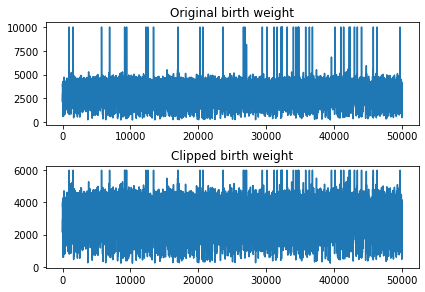

In [66]:
df['DBWT_clipped'] = np.where(df['DBWT']>6000, 6000, df['DBWT'])

fig, axs = plt.subplots(2)
fig.tight_layout(h_pad=2)
axs[0].set_title('Original birth weight')
axs[0].plot(df['DBWT'])
axs[1].set_title('Clipped birth weight')
axs[1].plot(df['DBWT_clipped'])

##Regression model


In [67]:
# pip install lazypredict

In [68]:
df['SEX'] = np.where(df['SEX']=='M', 1, 0)
#Male = 1, Female = 0

In [69]:
df.head()

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DOB_MM,DOB_WK,DOB_YY,DWgt_R,MAGER,MEDUC,M_Ht_In,PREVIS,SEX,WTGAIN,DBWT_clipped
0,1,1,36.90,10,2900,11,3,2018,225,39,2,64,5,0,10,2900
1,2,1,32.40,6,2155,1,2,2018,235,27,3,67,12,0,28,2155
2,1,1,24.50,0,3460,9,5,2018,179,31,6,66,17,0,27,3460
3,1,1,26.60,0,3880,1,1,2018,229,25,2,69,11,0,49,3880
4,1,1,44.50,0,3600,2,2,2018,273,26,4,63,11,1,22,3600


In [96]:
X = df.drop(['DBWT', 'DBWT_clipped'], axis = 1)
y = df['DBWT_clipped']

In [104]:
x_col_list = X.columns
x_col_list

Index(['ATTEND', 'BFACIL', 'BMI', 'CIG_0', 'DOB_MM', 'DOB_WK', 'DOB_YY',
       'DWgt_R', 'MAGER', 'MEDUC', 'M_Ht_In', 'PREVIS', 'SEX', 'WTGAIN'],
      dtype='object')

In [121]:
from sklearn.preprocessing import StandardScaler

scaler_train = StandardScaler()
scaler_train.fit(X)
scaled_X = scaler_train.transform(X)

scaler_target = StandardScaler()
scaler_target.fit(np.reshape(np.array(y), (-1,1)))
scaled_Y = scaler_target.transform(np.reshape(np.array(y), (-1,1)))


In [125]:
from sklearn.model_selection import train_test_split
# from lazypredict.Supervised import LazyClassifier, LazyRegressor

X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_Y,test_size=.3,random_state =123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, X.shape, y.shape)
# reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
# models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# print(models)


(35000, 14) (15000, 14) (35000, 1) (15000, 1) (50000, 14) (50000,)


In [126]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

In [127]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(preds, y_test))

0.9466729083191173


In [128]:
from sklearn.ensemble  import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

preds = model.predict(X_test)

In [129]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(preds, y_test))

0.8585813966180644


In [130]:
from sklearn.linear_model import ElasticNet

clf = ElasticNet()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

In [131]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(preds, y_test))

0.9890670373738261


In [132]:
from sklearn.linear_model import SGDRegressor

clf = SGDRegressor()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

In [133]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(preds, y_test))

0.9494093321665038


In [134]:
# pip install catboost

In [135]:
from catboost import CatBoostRegressor

clf = CatBoostRegressor()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

Learning rate set to 0.071803
0:	learn: 0.9960956	total: 7.17ms	remaining: 7.16s
1:	learn: 0.9910012	total: 13.2ms	remaining: 6.6s
2:	learn: 0.9859060	total: 20.3ms	remaining: 6.75s
3:	learn: 0.9814177	total: 26.8ms	remaining: 6.67s
4:	learn: 0.9775676	total: 33.4ms	remaining: 6.65s
5:	learn: 0.9744153	total: 42.6ms	remaining: 7.06s
6:	learn: 0.9713908	total: 55.6ms	remaining: 7.89s
7:	learn: 0.9685897	total: 66ms	remaining: 8.18s
8:	learn: 0.9660416	total: 75.1ms	remaining: 8.27s
9:	learn: 0.9639220	total: 82.7ms	remaining: 8.18s
10:	learn: 0.9617710	total: 89ms	remaining: 8s
11:	learn: 0.9598625	total: 95.6ms	remaining: 7.87s
12:	learn: 0.9581106	total: 102ms	remaining: 7.76s
13:	learn: 0.9565803	total: 108ms	remaining: 7.63s
14:	learn: 0.9550486	total: 114ms	remaining: 7.48s
15:	learn: 0.9538283	total: 120ms	remaining: 7.38s
16:	learn: 0.9524732	total: 126ms	remaining: 7.29s
17:	learn: 0.9513535	total: 132ms	remaining: 7.2s
18:	learn: 0.9504281	total: 143ms	remaining: 7.36s
19:	lear

In [136]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(preds, y_test))

0.8711692582450455


In [137]:
from xgboost.sklearn import XGBRegressor

clf = XGBRegressor()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

In [138]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(preds, y_test))

0.9105597975699139


In [139]:
from lightgbm import LGBMRegressor

clf = LGBMRegressor()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

In [140]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(preds, y_test))

0.8631553696562261


In [143]:
check = pd.DataFrame(X_test)
check.columns = x_col_list
check

,ATTEND,BFACIL,BMI,CIG_0,DOB_MM,DOB_WK,DOB_YY,DWgt_R,MAGER,MEDUC,M_Ht_In,PREVIS,SEX,WTGAIN
0,-0.43,-0.11,-0.48,-0.19,0.72,-0.03,0.00,-0.14,0.17,0.32,0.73,-0.03,0.98,0.44
1,-0.43,-0.11,-0.82,-0.19,-1.33,1.59,0.00,-0.49,0.51,1.98,-0.08,-0.17,0.98,0.49
2,-0.43,-0.11,-0.55,-0.19,1.30,-1.65,0.00,-0.71,2.23,0.87,-0.89,0.18,-1.02,-1.08
3,-0.43,-0.11,0.05,-0.19,1.01,-1.11,0.00,0.19,0.68,0.87,0.19,-0.66,0.98,0.60
4,-0.43,-0.11,-0.61,-0.19,-0.45,-0.57,0.00,-0.45,-1.55,-0.79,-0.62,-0.17,-1.02,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.18,-0.11,-0.61,-0.19,-1.04,0.51,0.00,-0.52,-1.21,-0.79,-0.62,-0.10,-1.02,-0.08
14996,-0.43,-0.11,-0.10,-0.19,0.72,-0.03,0.00,0.12,-2.07,-1.34,-0.08,-0.10,-1.02,1.07
14997,-0.43,-0.11,0.11,-0.19,-1.33,0.51,0.00,0.09,1.20,0.87,0.73,-0.03,-1.02,-0.77
14998,-0.43,-0.11,1.24,-0.19,0.13,1.05,0.00,7.70,0.17,-0.23,-1.43,-0.24,-1.02,3.53


##Data Exploration

<ipython-input-9-4bee0b5a5cc8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DBWT'])


<Axes: xlabel='DBWT', ylabel='Density'>

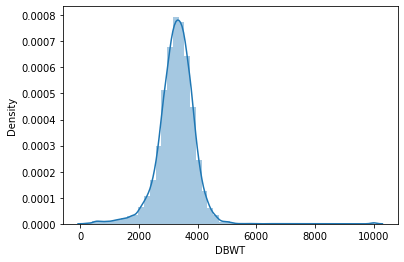

In [9]:
sns.distplot(df['DBWT'])

In [ ]:
# pip install shap

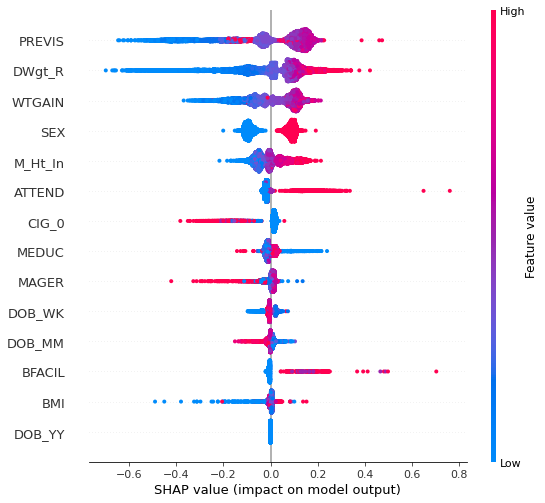

In [144]:
# %%time
import shap

shap.initjs()
ex = shap.TreeExplainer(model)
shap_values = ex.shap_values(check)
shap.summary_plot(shap_values, check, max_display=50)


ATTEND



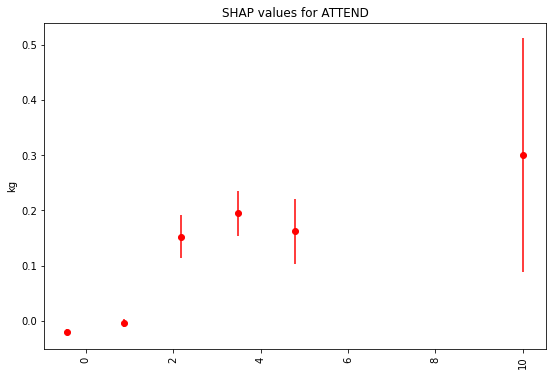

       gain  gain_std  count
col                         
10.02  0.30      0.21     11
3.49   0.19      0.04    110
4.79   0.16      0.06    140
2.18   0.15      0.04   1403
0.87  -0.00      0.01   1154
-0.43 -0.02      0.00  12182

BFACIL



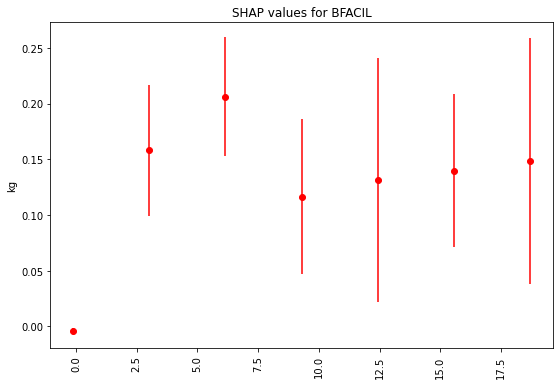

       gain  gain_std  count
col                         
6.16   0.21      0.05    123
3.02   0.16      0.06     83
18.69  0.15      0.11     21
15.56  0.14      0.07      2
12.42  0.13      0.11     20
9.29   0.12      0.07     18
-0.11 -0.00      0.00  14733

BMI



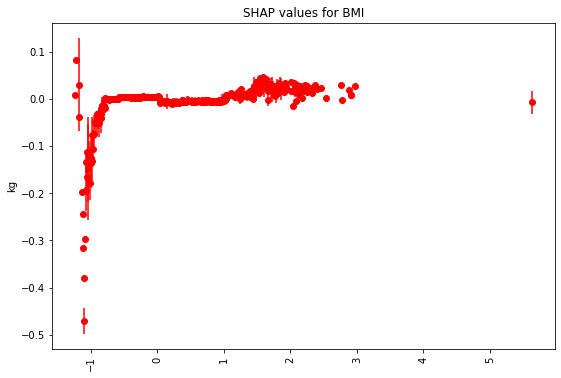

       gain  gain_std  count
col                         
-1.22  0.08       NaN      1
1.58   0.05       NaN      1
1.55   0.04      0.00      2
1.64   0.04       NaN      1
1.57   0.04      0.00      2
...     ...       ...    ...
-1.12 -0.24       NaN      1
-1.09 -0.30       NaN      1
-1.12 -0.32      0.01      3
-1.11 -0.38       NaN      1
-1.10 -0.47      0.03      2

[414 rows x 3 columns]

CIG_0



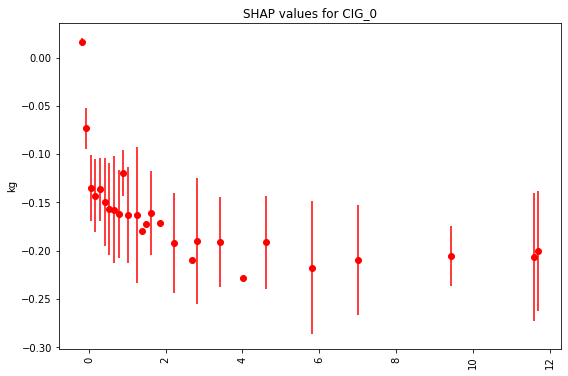

       gain  gain_std  count
col                         
-0.19  0.02      0.00  13678
-0.07 -0.07      0.02     41
0.89  -0.12      0.02      4
0.05  -0.14      0.03     59
0.29  -0.14      0.03     45
0.17  -0.14      0.04     58
0.41  -0.15      0.05    137
0.53  -0.16      0.05     41
0.65  -0.16      0.06     18
1.61  -0.16      0.04     42
0.77  -0.16      0.05     21
1.01  -0.16      0.05    327
1.25  -0.16      0.07     11
1.85  -0.17       NaN      1
1.49  -0.17       NaN      1
1.37  -0.18       NaN      1
2.81  -0.19      0.06      4
3.42  -0.19      0.05     23
4.62  -0.19      0.05     40
2.21  -0.19      0.05    350
11.70 -0.20      0.06     85
9.42  -0.21      0.03      2
11.58 -0.21      0.07      3
2.69  -0.21       NaN      1
7.02  -0.21      0.06      4
5.82  -0.22      0.07      2
4.02  -0.23       NaN      1

DOB_MM



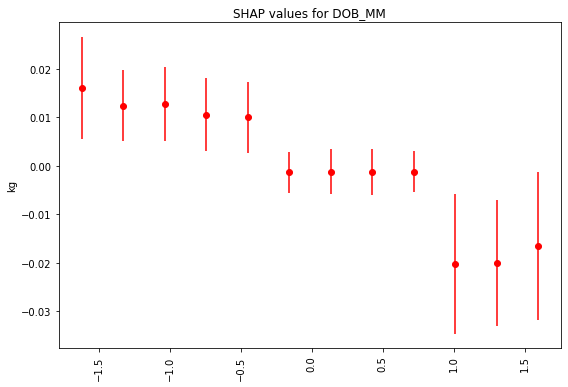

       gain  gain_std  count
col                         
-1.62  0.02      0.01   1269
-1.04  0.01      0.01   1281
-1.33  0.01      0.01   1151
-0.74  0.01      0.01   1159
-0.45  0.01      0.01   1249
0.13  -0.00      0.00   1292
0.72  -0.00      0.00   1249
0.43  -0.00      0.00   1407
-0.16 -0.00      0.00   1183
1.60  -0.02      0.02   1236
1.30  -0.02      0.01   1228
1.01  -0.02      0.01   1296

DOB_WK



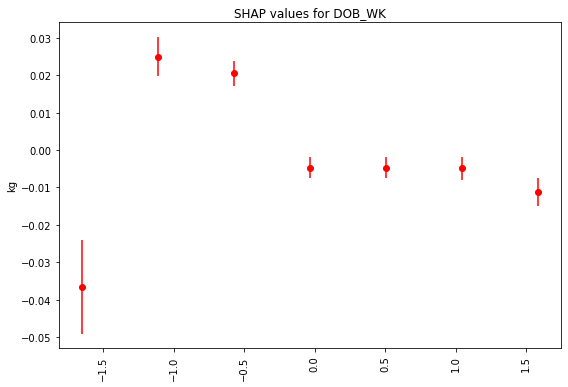

       gain  gain_std  count
col                         
-1.11  0.03      0.01   2300
-0.57  0.02      0.00   2450
-0.03 -0.00      0.00   2366
0.51  -0.00      0.00   2347
1.05  -0.00      0.00   2356
1.59  -0.01      0.00   1701
-1.65 -0.04      0.01   1480

DOB_YY



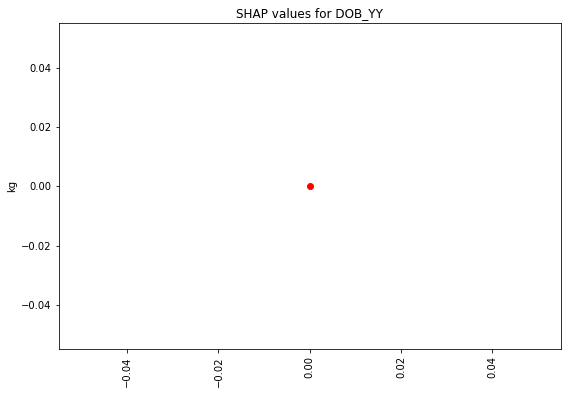

      gain  gain_std  count
col                        
0.00  0.00      0.00  15000

DWgt_R



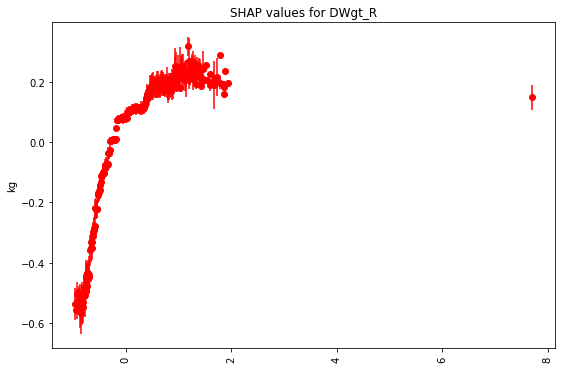

       gain  gain_std  count
col                         
1.18   0.32      0.03      2
1.78   0.29       NaN      1
1.25   0.27      0.02      3
1.19   0.27      0.08      3
1.23   0.27       NaN      1
...     ...       ...    ...
-0.80 -0.55      0.05      9
-0.91 -0.55       NaN      1
-0.94 -0.56       NaN      1
-0.86 -0.56      0.06     10
-0.85 -0.57      0.07      5

[266 rows x 3 columns]

MAGER



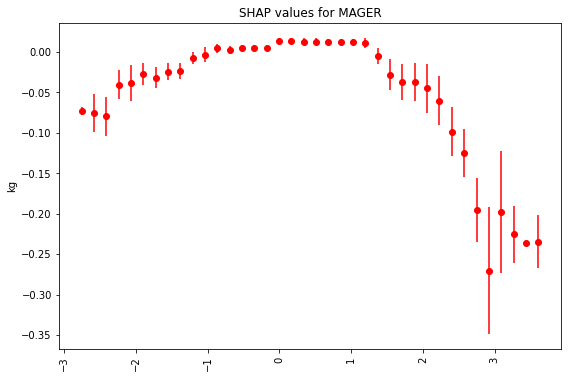

       gain  gain_std  count
col                         
0.17   0.01      0.00    935
-0.01  0.01      0.00    919
0.51   0.01      0.00    924
0.85   0.01      0.00    721
0.34   0.01      0.00    989
1.03   0.01      0.00    644
0.68   0.01      0.00    779
1.20   0.01      0.01    553
-0.35  0.01      0.00    864
-0.18  0.01      0.00    897
-0.52  0.00      0.00    798
-0.87  0.00      0.01    675
-0.69  0.00      0.01    746
-1.04 -0.00      0.01    674
1.37  -0.01      0.01    422
-1.21 -0.01      0.01    575
-1.38 -0.02      0.01    568
-1.55 -0.02      0.01    424
-1.90 -0.03      0.01    193
1.54  -0.03      0.02    347
-1.73 -0.03      0.01    353
1.71  -0.04      0.02    295
1.89  -0.04      0.02    183
-2.07 -0.04      0.02    111
-2.24 -0.04      0.02     59
2.06  -0.04      0.03    115
2.23  -0.06      0.03     96
-2.76 -0.07      0.00      4
-2.58 -0.08      0.02      7
-2.41 -0.08      0.02     15
2.40  -0.10      0.03     45
2.57  -0.13      0.03     24
2.75  -0.20   

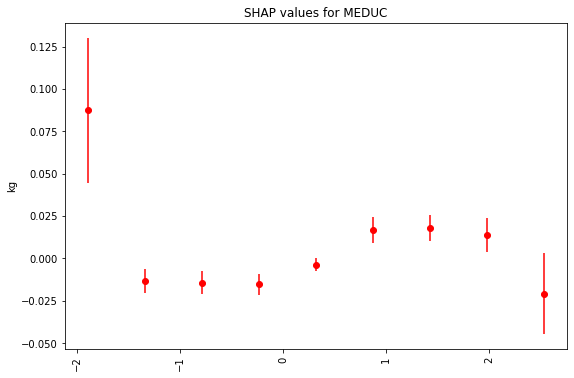

       gain  gain_std  count
col                         
-1.89  0.09      0.04    472
1.43   0.02      0.01   1371
0.87   0.02      0.01   3072
1.98   0.01      0.01    429
0.32  -0.00      0.00   1241
-1.34 -0.01      0.01   1416
-0.79 -0.01      0.01   3817
-0.23 -0.02      0.01   2984
2.53  -0.02      0.02    198

M_Ht_In



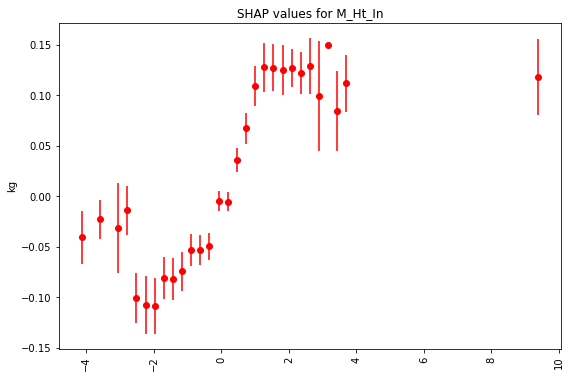

       gain  gain_std  count
col                         
3.17   0.15       NaN      1
2.63   0.13      0.03     14
1.27   0.13      0.02    486
1.54   0.13      0.02    261
2.09   0.13      0.02     66
1.82   0.13      0.02    142
2.36   0.12      0.02     21
9.39   0.12      0.04     60
3.71   0.11      0.03      2
1.00   0.11      0.02    749
2.90   0.10      0.05      4
3.44   0.08      0.04      2
0.73   0.07      0.02   1346
0.46   0.04      0.01   1631
-0.08 -0.00      0.01   2177
0.19  -0.01      0.01   1750
-2.78 -0.01      0.02      7
-3.60 -0.02      0.02      2
-3.05 -0.03      0.04     10
-4.14 -0.04      0.03      3
-0.35 -0.05      0.01   1925
-0.62 -0.05      0.02   1923
-0.89 -0.05      0.02   1082
-1.16 -0.07      0.02    807
-1.70 -0.08      0.02     88
-1.43 -0.08      0.02    332
-2.51 -0.10      0.02     11
-2.24 -0.11      0.03     29
-1.97 -0.11      0.03     69

PREVIS



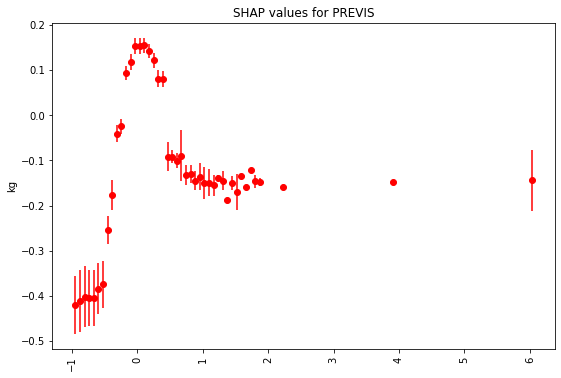

       gain  gain_std  count
col                         
0.11   0.15      0.02    939
0.04   0.15      0.02   1242
-0.03  0.15      0.02   1431
0.18   0.14      0.02    434
0.25   0.12      0.02    231
-0.10  0.12      0.02   2295
-0.17  0.09      0.02   1479
0.32   0.08      0.02    193
0.39   0.08      0.02    105
-0.24 -0.02      0.02   1889
-0.31 -0.04      0.02    967
0.67  -0.09      0.06     28
0.46  -0.09      0.03    164
0.53  -0.09      0.01     42
0.60  -0.10      0.02     43
1.73  -0.12       NaN      1
0.82  -0.13      0.02     56
0.74  -0.13      0.02     32
1.59  -0.14       NaN      1
0.96  -0.14      0.03     12
1.24  -0.14      0.01      2
6.03  -0.14      0.07    365
1.31  -0.15      0.02      6
0.89  -0.15      0.02      8
1.80  -0.15      0.01      3
1.87  -0.15      0.01      2
3.92  -0.15       NaN      1
1.10  -0.15      0.03      3
1.03  -0.15      0.04      4
1.45  -0.15      0.01      3
1.17  -0.16      0.02     23
1.66  -0.16       NaN      1
2.22  -0.16   

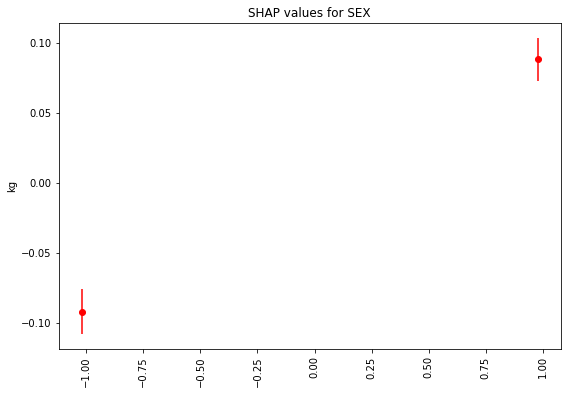

       gain  gain_std  count
col                         
0.98   0.09      0.02   7657
-1.02 -0.09      0.02   7343

WTGAIN



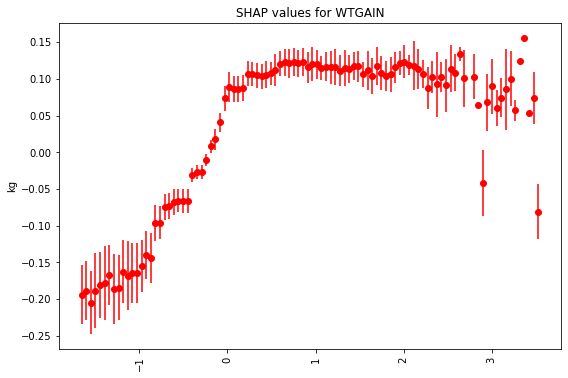

       gain  gain_std  count
col                         
3.37   0.16       NaN      1
2.64   0.13      0.01      2
3.32   0.12       NaN      1
2.01   0.12      0.02     39
0.86   0.12      0.02    143
...     ...       ...    ...
-1.29 -0.19      0.05     97
-1.60 -0.19      0.04     46
-1.50 -0.19      0.05     68
-1.66 -0.19      0.04    430
-1.55 -0.21      0.04     75

[99 rows x 3 columns]


In [145]:
def show_shap(col='company'):
    df_infl = check.copy()
    df_infl['shap_'] = shap_values[:,df_infl.columns.tolist().index(col)]
    gain = round(df_infl.groupby(col).mean()['shap_'],4)
    gain_std = round(df_infl.groupby(col).std()['shap_'],4)
    cnt = df_infl.groupby(col).count()['shap_']
    dd_dict = {'col': list(gain.index), 'gain': list(gain.values), 'gain_std': list(gain_std.values), 'count': cnt}
    df_res = pd.DataFrame.from_dict(dd_dict).sort_values('gain', ascending=False).set_index('col')
    plt.figure(figsize=(9,6))
    plt.errorbar(df_res.index, df_res['gain'], yerr=df_res['gain_std'], fmt="o", color="r")
    plt.title(f'SHAP values for {col}')
    plt.ylabel('kg')
    plt.tick_params(axis="x", rotation=90)
    plt.show();
    print(df_res)
    return

for col in check.columns:
    print()
    print(col)
    print()
    show_shap(col)